Use email data classified as spam or "ham" (not spam) to build logistic regression model to detect spam based on word presence.

Visualize words most associated with spam and ham.

In [1]:
#module imports for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#extract data from google drive
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

Using version already downloaded: Sat Oct 24 11:16:33 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Sat Oct 24 11:16:37 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


In [3]:
#check for null values
total_train_NaN = original_training_data.isnull().sum()
total_test_NaN = test.isnull().sum()
print(total_train_NaN, total_test_NaN)
original_training_data = original_training_data.fillna("")
test = test.fillna("")
total_train_NaN = original_training_data.isnull().sum()
total_test_NaN = test.isnull().sum()
print(total_train_NaN, total_test_NaN)

id         0
subject    6
email      0
spam       0
dtype: int64 id         0
subject    1
email      0
dtype: int64
id         0
subject    0
email      0
spam       0
dtype: int64 id         0
subject    0
email      0
dtype: int64


In [4]:
#look into first of each classified email type
first_ham = original_training_data["email"][0]
first_spam = original_training_data["email"][2]
print(first_ham)
print(first_spam)

url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
 
 



In [5]:
from sklearn.model_selection import train_test_split
#train-val split
train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

C:\Users\nicka\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nicka\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


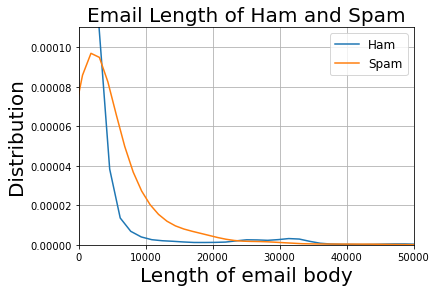

In [6]:
#visualize email lengths of different types
copy = train.copy(deep=True)
copy["email length"] = copy["email"].apply(len)
sns.distplot(copy[copy["spam"]==0]["email length"],hist=False,label="Ham").set(xlim=(0,50000),ylim=(0,.00011))
sns.distplot(copy[copy["spam"]==1]["email length"],hist=False,label="Spam").set(xlim=(0,50000),ylim=(0,.00011))
plt.title("Email Length of Ham and Spam",fontsize=20)
plt.xlabel("Length of email body",fontsize=20)
plt.ylabel("Distribution",fontsize=20)
plt.legend(fontsize=12)
plt.grid(True);


In [7]:
#use top 100 words in data set
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=100,stop_words='english')
X_train = vectorizer.fit_transform(train['email'])
Y_train = train['spam']
train_vocab = vectorizer.get_feature_names()

In [8]:
#train logistic regression classifier to detect spam or "ham" (not spam emails)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

training_accuracy = model.score(X_train,Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9161453480633569


C:\Users\nicka\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
val_vectorizer = CountVectorizer(max_features=100,stop_words='english')

X_val = val_vectorizer.fit_transform(val['email'])
Y_val = val['spam']

In [10]:
val_accuracy = model.score(X_val, Y_val)
print("Validation Accuracy: ", val_accuracy)

Validation Accuracy:  0.7988023952095809


C:\Users\nicka\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[None, Text(0.5, 0, 'Coefficient'), Text(0, 0.5, 'Log Count')]

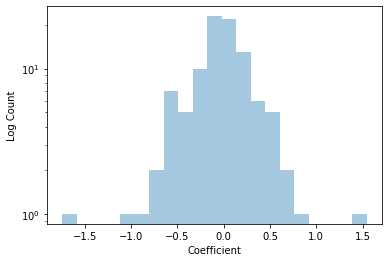

In [11]:
#visualization distribution of coefficients in classification model
from itertools import chain
model.coef_.tolist()
flatten_list = list(chain.from_iterable(model.coef_.tolist())) 

dt=list(zip(train_vocab,flatten_list))
cv=pd.DataFrame(dt, columns=['Vocab','Coef'])
cv
ax=sns.distplot(cv['Coef'],kde=False)
ax.set(yscale='log',xlabel='Coefficient',ylabel="Log Count")

most associated with spam: 8          2002
74          rpm
26    clickthru
92        users
52         left
33          don
71          org
84       target
57     listinfo
93       valign
Name: Vocab, dtype: object
most associated with ham: 18         border
49    information
88          title
69         online
61        mailing
25          click
13          align
39           free
64          money
17           body
Name: Vocab, dtype: object


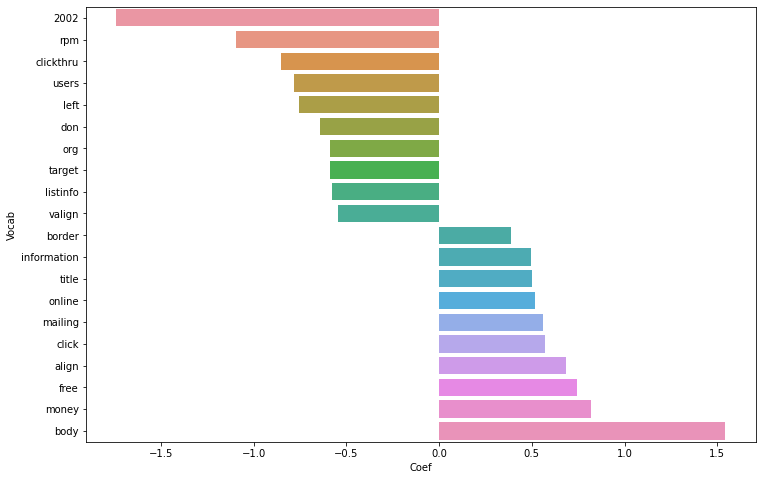

In [12]:
#plot top 10 coefficients for each type of email
fig= plt.figure(figsize=(12,8))
cvs=cv.sort_values(by=['Coef'])
cvs
top_10_spam = cvs['Vocab'].head(10)
top_10_ham = cvs['Vocab'].tail(10)

spam10 = cvs.head(10)
ham10 = cvs.tail(10)
frames=[spam10,ham10]
together=pd.concat(frames)
print("most associated with spam:",top_10_spam)
print("most associated with ham:",top_10_ham)
ax2= sns.barplot(x='Coef', y='Vocab', data=together)

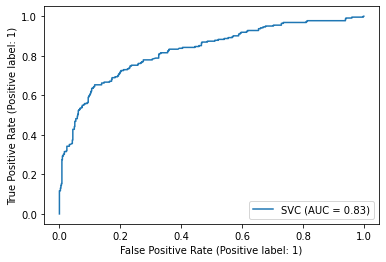

In [13]:
from sklearn import metrics, svm
#ROC curve for cutoff probability
roc = svm.SVC(random_state=0)
roc.fit(X_train, Y_train)
metrics.plot_roc_curve(roc, X_val, Y_val)

[[561 116]
 [ 52 106]]


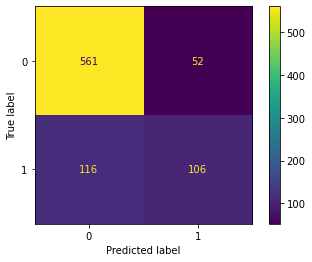

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#confusion matrix for classifier results
pred=model.predict(X_val)
display = confusion_matrix(pred, Y_val)
plot_confusion_matrix(model,X_val,Y_val)
print(display)